<a href="https://colab.research.google.com/github/hagusta/colab/blob/master/casava_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
import os
my_drive='/content/gdrive/MyDrive'
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/root/"
base_dir = root_dir + 'casava_disease/'
kaggle_json='gdrive/MyDrive/kaggle.json'
model_dir='gdrive/MyDrive/casava'
working_dir='/dev/shm'
save_dir='gdrive/MyDrive/casava_disease'

Mounted at /content/gdrive


In [7]:
!mkdir /root/.kaggle
!cp 'gdrive/MyDrive/kaggle.json' /root/.kaggle
!ls -l /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
total 4
-rw------- 1 root root 63 Feb 12 01:07 kaggle.json


# GIT UPDate

In [14]:
!ls -al $my_drive/'Colab Notebooks'

total 1315
-rw------- 1 root root 1314836 Feb 12 01:09 casava-leaf-disease.ipynb
drwx------ 7 root root    4096 Feb 12 01:09 .git
-rw------- 1 root root   26371 Feb 11 05:20 Test.ipynb


In [11]:
!git init $my_drive/'Colab Notebooks'/

Initialized empty Git repository in /content/gdrive/MyDrive/Colab Notebooks/.git/


In [13]:
!git add  $my_drive/'Colab Notebooks' -a

fatal: not a git repository (or any of the parent directories): .git




--------------------------------------------------------------------------------
#Download Data from kaggle
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [ ]:
|!pip uninstall -y kaggle
!pip install kaggle

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=3815bcaf6b913c7f2b722b2c8249e5e6b83760f67208a8a143da0c9cd542351e
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle


In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification -p $base_dir
!ls -l $base_dir

In [ ]:
import zipfile

In [ ]:
import os
list_zip = [f.replace('.zip','') for f in os.listdir(base_dir) if '.zip' in f]
for f in list_zip:
  with zipfile.ZipFile(base_dir + f + '.zip',mode='r') as zf:
    zf.extractall(base_dir+'/casava')

In [ ]:
!ls -l $base_dir
!df -h 

total 6040696
drwxr-xr-x 6 root root       4096 Jan 31 08:45 casava
-rw-r--r-- 1 root root 6185662420 Jan 31 08:43 cassava-leaf-disease-classification.zip
Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   44G   25G  65% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive


In [ ]:
!rm -rf $base_dir/casava/*_tfrecords
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   41G   28G  60% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive


In [ ]:
!ls -l $base_dir/casava

total 1080
-rw-r--r-- 1 root root    172 Jan 31 08:44 label_num_to_disease_map.json
-rw-r--r-- 1 root root     32 Jan 31 08:44 sample_submission.csv
drwxr-xr-x 2 root root   4096 Jan 31 08:44 test_images
-rw-r--r-- 1 root root 358283 Jan 31 08:44 train.csv
drwxr-xr-x 2 root root 729088 Jan 31 08:45 train_images


In [ ]:
!mv $base_dir/casava /dev/shm

In [ ]:
!df -h
!ls -l /dev/shm

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   31G  56% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G  2.5G  3.4G  43% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive
total 0
drwxr-xr-x 4 root root 140 Jan 31 08:47 casava


In [ ]:
!tar zcf /dev/shm/casava.tar.gz /dev/shm/casava

tar: Removing leading `/' from member names


In [ ]:
!ls -l /dev/shm

total 0
drwxr-xr-x 4 root root 140 Jan 31 08:47 casava


In [ ]:
!mv /dev/shm/casava.tar.gz $my_drive/casava_data/

In [ ]:
!rm $base_dir/cassava-leaf-disease-classification.zip
!rm -rf $base_dir/test_*
!rm -rf $base_dir/train_*
!ls -l $base_dir
!ls -l $my_drive

rm: cannot remove '/root/casava_disease//cassava-leaf-disease-classification.zip': No such file or directory
total 0
total 178
drwx------ 2 root root   4096 Jan 26 08:52  casava
drwx------ 2 root root   4096 Jan 31 08:52  casava_data
-rw------- 1 root root 144643 Jan 23 10:19 'Form Pemanatauan PTM-hendy-merku-barat-3.pdf'
-rw------- 1 root root  12174 Jan 21 16:44 'Form Pemantauan PTM (1).docx'
-rw------- 1 root root  12191 Jan 22 06:14 'Form Pemantauan PTM.docx'
-rw------- 1 root root     63 Jan 25 03:20  kaggle.json
drwx------ 2 root root   4096 Dec  1 02:59 'my google drive'


--------------------------------------------------------------------------------
#Prep Data
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [ ]:
import os  
from pathlib import Path 
import pandas as pd
import json
import shutil

In [ ]:
!tar xzf gdrive/MyDrive/casava_data/casava.tar.gz --directory /dev/shm
!ls -lrt /dev/shm/casava

total 360
-rw-r--r-- 1 root root 358283 Jan 31 08:44 train.csv
drwxr-xr-x 2 root root     60 Jan 31 08:44 test_images
-rw-r--r-- 1 root root     32 Jan 31 08:44 sample_submission.csv
-rw-r--r-- 1 root root    172 Jan 31 08:44 label_num_to_disease_map.json
drwxr-xr-x 7 root root    140 Feb  1 06:17 train_images


In [ ]:
#@title
df=pd.read_csv('/dev/shm/casava/train.csv')
f=open('/dev/shm/casava/label_num_to_disease_map.json')
#label_name=dict(json.load(f))
label_name_dict=dict({'0':'CBB',
                 '1':'CBSD',
                 '2':'CGM',
                 '3':'CMD',
                 '4':'Healty'})
imgs=df.image_id.to_list()
lbl=df.label.to_list()
labels=[ label_name_dict[str(i)] for i in lbl]
label_dict=dict(zip(imgs,labels))

In [ ]:
#@title
list_img=None
list_img=[f for f in os.listdir(working_dir+'/casava/train_images')]
imgs=df.image_id.to_list()
lbl=df.label.to_list()
labels=[ label_name_dict[str(i)] for i in lbl]
label_dict=dict(zip(imgs,labels))
fnames=[ Path(working_dir)/'casava'/'train_images'/label_dict[img]/img for img in imgs ]
print(len(labels),len(list_img),labels[:5],list_img[:5],fnames[:5] )

# Prep Data (hide)

In [ ]:
for f in fnames:
  if f.is_file(): 
    cls_path=f.parent/label_dict[f.name]
    #print(cls_path)
    if not cls_path.is_dir():
      os.makedirs(cls_path)
      #print('create: ', cls_path)
    #print(f.name,f.parent,f.parent/label_dict[f.name]/f.name)
    shutil.move(f,cls_path/f.name)

NameError: ignored

In [ ]:
!ls -l /dev/shm/casava/train_images

total 0
drwxr-xr-x 2 root root  21780 Feb  1 06:17 CBB
drwxr-xr-x 2 root root  43820 Feb  1 06:17 CBSD
drwxr-xr-x 2 root root  47760 Feb  1 06:17 CGM
drwxr-xr-x 2 root root 263200 Feb  1 06:17 CMD
drwxr-xr-x 2 root root  51580 Feb  1 06:17 Healty


In [ ]:
!tar zcf /dev/shm/casava.tar.gz /dev/shm/casava --transform='s/dev\/shm\///g'

tar: Removing leading `/' from member names


In [ ]:
!tar -tvf /dev/shm/casava.tar.gz|head

drwxr-xr-x root/root         0 2021-01-31 08:47 casava/
-rw-r--r-- root/root       172 2021-01-31 08:44 casava/label_num_to_disease_map.json
-rw-r--r-- root/root        32 2021-01-31 08:44 casava/sample_submission.csv
drwxr-xr-x root/root         0 2021-01-31 08:44 casava/test_images/
-rw-r--r-- root/root    144281 2021-01-31 08:44 casava/test_images/2216849948.jpg
-rw-r--r-- root/root    358283 2021-01-31 08:44 casava/train.csv
drwxr-xr-x root/root         0 2021-02-01 06:17 casava/train_images/
drwxr-xr-x root/root         0 2021-02-01 06:17 casava/train_images/Healty/
-rw-r--r-- root/root    127827 2021-01-31 08:45 casava/train_images/Healty/999998473.jpg
-rw-r--r-- root/root     99003 2021-01-31 08:45 casava/train_images/Healty/999616605.jpg


In [ ]:
!mv /dev/shm/casava.tar.gz gdrive/MyDrive/casava_data

# Fastai install


In [ ]:
!pip install -Uqq fastai
!pip install -Uqq fastbook
import fastai
import fastbook
import torch

fastbook.setup_book()

     |████████████████████████████████| 194kB 14.7MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 727kB 14.9MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 53.8MB/s 


In [ ]:
fastai.__version__

'2.2.5'

In [ ]:
!nvidia-smi

Thu Feb 11 05:17:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(torch.device.type)
print(torch.__version__)
print(torch.version.cuda)
os.environ

<attribute 'type' of 'torch.device' objects>
1.7.0+cu101
10.1


environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', '__EGL_VENDOR_LIBRARY_DIRS': '/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/lib64-nvidia', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.8.3', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20210203', 'JPY_PARENT_PID': '48', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"

# Data Loader

In [ ]:
from fastai.vision.all import *

In [ ]:
def get_label(o): return label_dict[o.name]

In [ ]:
#del casava
casava=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #get_y=lambda p: label_dict[p.name],
    #get_y=parent_label,
    get_y=get_label,
    item_tfms=Resize(512),
    batch_tfms=[RandomResizedCrop(224),*aug_transforms(mult=2),Normalize.from_stats(*imagenet_stats)]
    )

In [ ]:
path=Path('/dev/shm/casava/train_images')
dls = casava.dataloaders(path,bs=32)

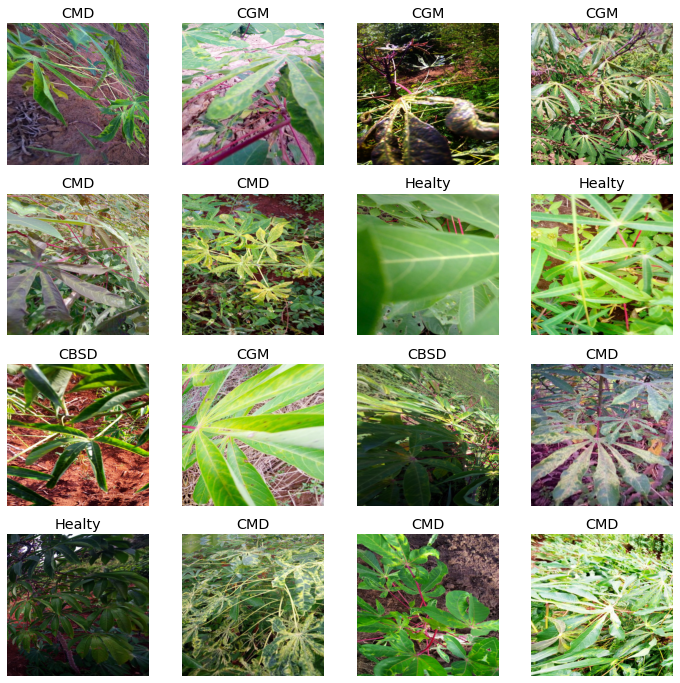

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
casava.summary(path)

Setting-up type transforms pipelines
Found 21397 items
2 datasets of sizes 17118,4279
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /dev/shm/casava/train_images/CMD/3647735432.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=800x600
  Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /dev/shm/casava/train_images/CMD/3647735432.jpg
    applying get_label gives
      CMD
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=800x600, TensorCategory(3))


Found 21397 items
2 datasets of sizes 17118,4279
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize --

In [ ]:
#@title
#casava = casava.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
casava = casava.new(item_tfms=Resize(460), 
                    batch_tfms=aug_transforms(size=224,mult=2),
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42)
                    )
#dls.train.show_batch(max_n=16, nrows=4)

# Learner

In [ ]:
learn = cnn_learner(dls,
                    models.resnet18,
                    metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.load(model_path/'casava_resnet18')

# Train

In [ ]:
learn.freeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.392449,0.381917,0.132508,05:31
1,0.373441,0.374950,0.126431,05:31


SuggestedLRs(lr_min=7.943282476219337e-10, lr_steep=3.981071916570045e-09)

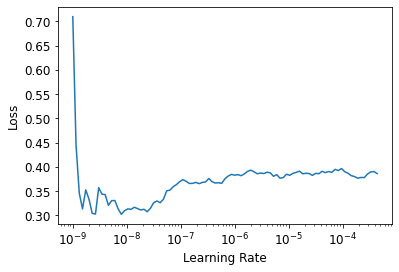

In [ ]:
learn.unfreeze()
learn.lr_find(start_lr=1e-09,end_lr=1e-03,stop_div=False)
#learn.lr_find()

In [ ]:
#learn.fit_one_cycle(20, lr_max=slice(1e-5,1e-3))
learn.fit_one_cycle(2, lr_max=1.4e-9)

epoch,train_loss,valid_loss,error_rate,time
0,0.354348,0.374969,0.125730,07:18
1,0.339417,0.373318,0.125263,07:18


In [ ]:
learn.fit_one_cycle(5, lr_max=1e-9)

epoch,train_loss,valid_loss,error_rate,time
0,0.360266,0.375996,0.129703,06:36
1,0.342926,0.373369,0.127600,06:37
2,0.366583,0.374256,0.127600,06:36
3,0.362092,0.374847,0.129469,06:38
4,0.369095,0.373667,0.128535,06:37


In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
model_path

Path('/content/gdrive/MyDrive/casava')

In [ ]:
learn.export(model_path/'casava_resnet18.pkl')
learn.save(model_path/'casava_resnet18')

Path('/content/gdrive/MyDrive/casava/casava_resnet18.pth')

In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.export(model_path/'casava_resnet34.pkl')
learn.save(model_path/'casava_resnet34')

Path('/content/gdrive/MyDrive/casava/casava_resnet34.pth')

# Train Resnext50_32x4d

In [ ]:
!pip install timm

     |████████████████████████████████| 245kB 15.9MB/s 


In [ ]:
import timm

In [ ]:
model = timm.create_model('resnext50_32x4d', pretrained=true)


In [ ]:
model.fc=nn.Linear(2048,5)

In [ ]:
learn = Learner(dls,
                    model,
                    metrics=error_rate).to_fp16()

In [ ]:
learn.freeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.623316,0.791349,0.254499,28:56
1,0.484274,0.442006,0.144660,29:00
2,0.391405,0.383848,0.127133,29:00


SuggestedLRs(lr_min=4.1686939766805153e-07, lr_steep=8.128305251098311e-10)

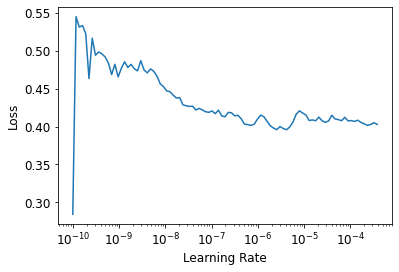

In [ ]:
learn.unfreeze()
learn.lr_find(start_lr=1e-10,end_lr=1e-03,stop_div=False)

In [ ]:
learn.fit_one_cycle(5,lr_max=slice(4e-6))

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.export(model_path/'casava_resnext50_32x4d.pkl')
learn.save(model_path/'casava_resnext50_32x4d')

Path('/content/gdrive/MyDrive/casava/casava_resnext50_32x4d.pth')

# Interpretation

In [ ]:
import gc
del interp
gc.collect()

NameError: ignored

In [ ]:
Path('gdrive/MyDrive/casava').absolute()


Path('/content/gdrive/MyDrive/casava')

In [ ]:
learn=learn.load('/content/gdrive/MyDrive/casava/casava_resnet18.3')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

RuntimeError: ignored

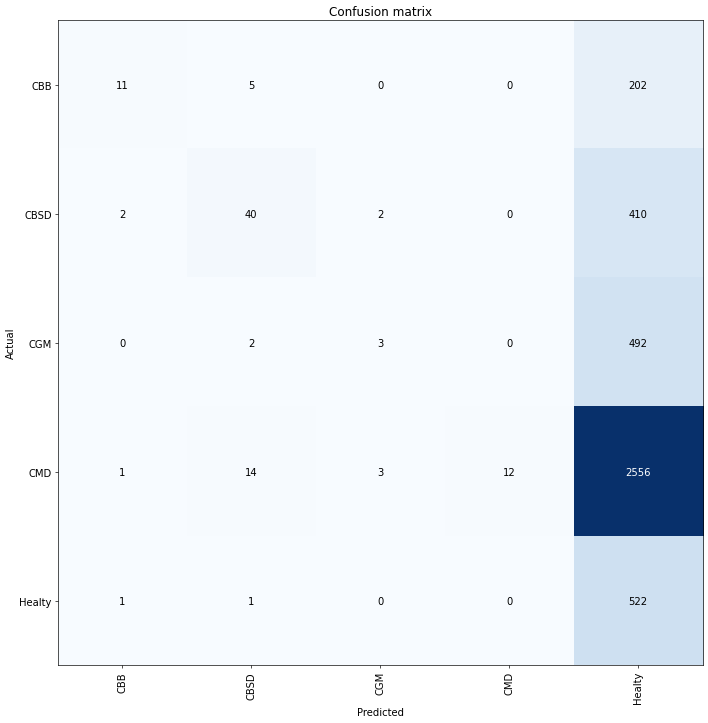

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Load Train

In [ ]:
!cp '/content/gdrive/MyDrive/casava/casava_resnet18.pth' /root
!cp '/content/gdrive/MyDrive/casava/casava_resnet18.pkl' /root

In [ ]:
!ls -l '/dev/shm/casava/test_images/2216849948.jpg'

-rw-r--r-- 1 root root 144281 Jan 31 08:44 /dev/shm/casava/test_images/2216849948.jpg


In [ ]:
test_img=Image.open('/dev/shm/casava/test_images/2216849948.jpg')
path_img=Path('/dev/shm/casava/test_images/2216849948.jpg')

In [ ]:
learn_inf = load_learner('/content/gdrive/MyDrive/casava/casava_resnet18.3.pkl')

In [ ]:
learn.predict(path_img)

('Healty',
 tensor(4),
 tensor([5.1153e-05, 1.3353e-07, 3.1498e-02, 4.9620e-06, 9.6845e-01]))

In [ ]:
learn_inf.predict(path_img)

('Healty',
 tensor(4),
 tensor([3.9227e-07, 5.8654e-06, 1.4852e-03, 1.2919e-03, 9.9722e-01]))

In [ ]:
!df 

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay         71724152 36675936  35031832  52% /
tmpfs              65536        0     65536   0% /dev
tmpfs            6666796        0   6666796   0% /sys/fs/cgroup
shm              6029312  2543192   3486120  43% /dev/shm
/dev/sda1       78224816 38255740  39952692  49% /opt/bin
tmpfs            6666796       36   6666760   1% /var/colab
tmpfs            6666796        0   6666796   0% /proc/acpi
tmpfs            6666796        0   6666796   0% /proc/scsi
tmpfs            6666796        0   6666796   0% /sys/firmware
drive           15728640  5459948  10268692  35% /content/gdrive


In [ ]:
!free

              total        used        free      shared  buff/cache   available
Mem:       13333596     9677624      490504     2556524     3165468     6470852
Swap:             0           0           0


In [ ]:
import gc
gc.collect()

82

In [ ]:
del learn_inf

NameError: ignored